# Imported Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Created Database Connection

In [2]:
conn = sqlite3.connect('travel.sqlite')
cursor = conn.cursor()

In [3]:
cursor.execute(""" SELECT name FROM sqlite_master WHERE type = 'table';""" )
print('List of tables present in the database')
table_list = [table[0] for table in  cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [4]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


# Data Exploration

In [5]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [6]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data.head()

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600


In [7]:
aircrafts_data.shape

(9, 3)

In [8]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [9]:
airports_data.shape

(104, 5)

In [10]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [11]:
boarding_passes.shape

(579686, 4)

In [12]:
bookings = pd.read_sql_query("select * from bookings", conn)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [13]:
bookings.shape

(262788, 3)

In [14]:
flights = pd.read_sql_query("select * from flights", conn)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [15]:
flights.shape

(33121, 10)

In [16]:
seats = pd.read_sql_query("select * from seats", conn)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [17]:
seats.shape

(1339, 3)

In [18]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", conn)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [19]:
ticket_flights.shape

(1045726, 4)

In [20]:
tickets = pd.read_sql_query("select * from tickets", conn)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


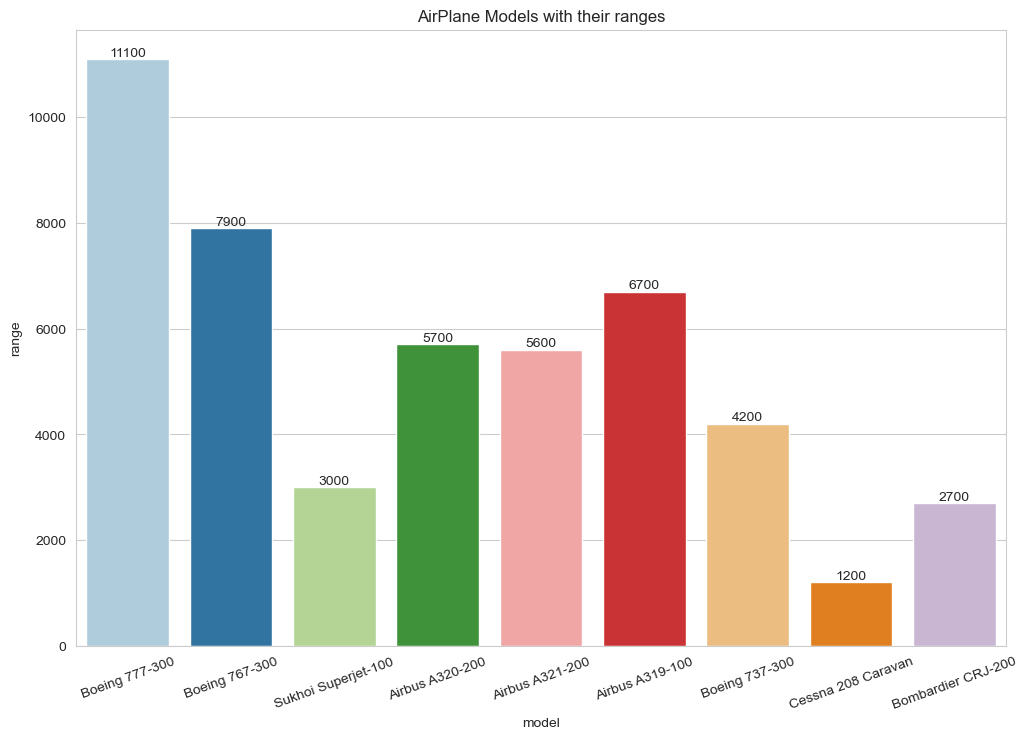

In [21]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='model',y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=20)
plt.show()


In [22]:
 for table in table_list: # iterate through table for table info
        print(f'\nTable:{table}')
        column_info  = conn.execute("PRAGMA table_info({})".format(table))
        for column  in column_info.fetchall(): # iterate through column
            print(column[1:3])  # performed slicing to only get columnname and datatype


Table:aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

Table:airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

Table:boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

Table:bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

Table:flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

Table:seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('

In [23]:
for table in table_list:
    print(f'\ntable: {table}')
    df_table = pd.read_sql_query(f"SELECT * FROM {table}",conn)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

How many planes have more than 100 seats?

In [24]:
pd.read_sql_query(""" SELECT aircraft_code, Count(*) AS Number_of_seats FROM seats
                      GROUP BY aircraft_code HAVING Number_of_seats > 100  """, conn)

,aircraft_code,Number_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


In [25]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        GROUP BY aircraft_code""", conn)
df

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


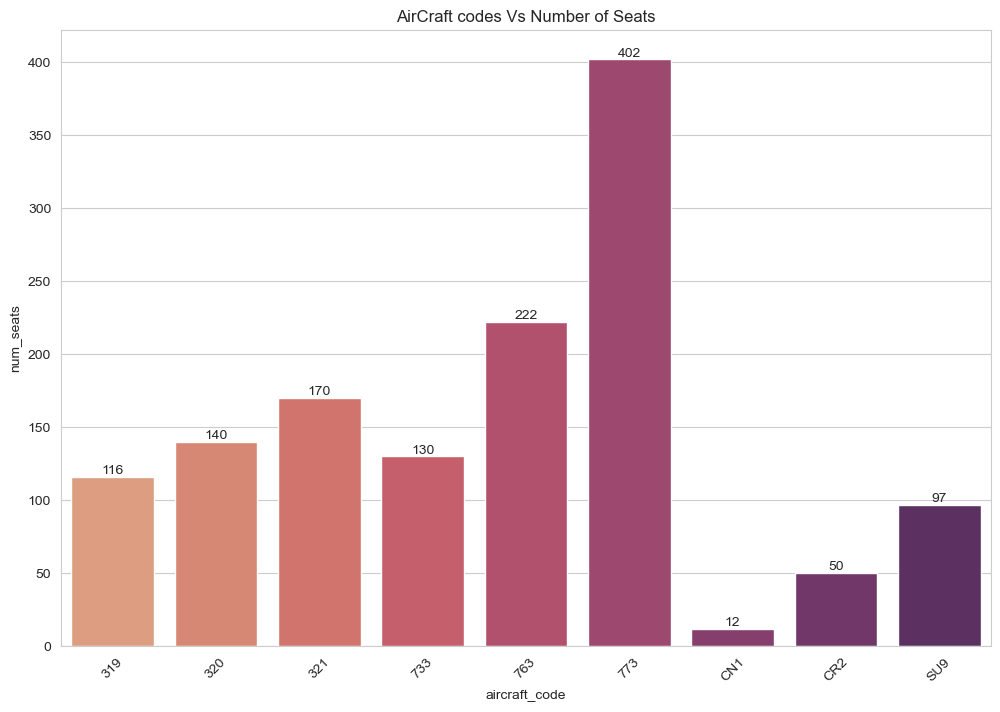

In [26]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='num_seats', data= df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()


Observation:


Here successfully derived the names of airplanes using their codes

So it seems like " Boeing 777-300 " is having maximum number of seats (402).

How the number of tickets booked and total amount earned changed with resepect to time?

In [27]:
ticket_df = pd.read_sql_query(""" SELECT * FROM tickets 
                       INNER JOIN  bookings
                       ON tickets.book_ref = bookings.book_ref """, conn)
ticket_df.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900


In [28]:
ticket_df.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [29]:
ticket_df['book_date']= pd.to_datetime(ticket_df['book_date'])
ticket_df['date'] = ticket_df['book_date'].dt.date
ticket_df.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03


# Number of tickets booked and total amount earned changed with the time

In [30]:
tickets_count= ticket_df.groupby('date')[['date']].count()

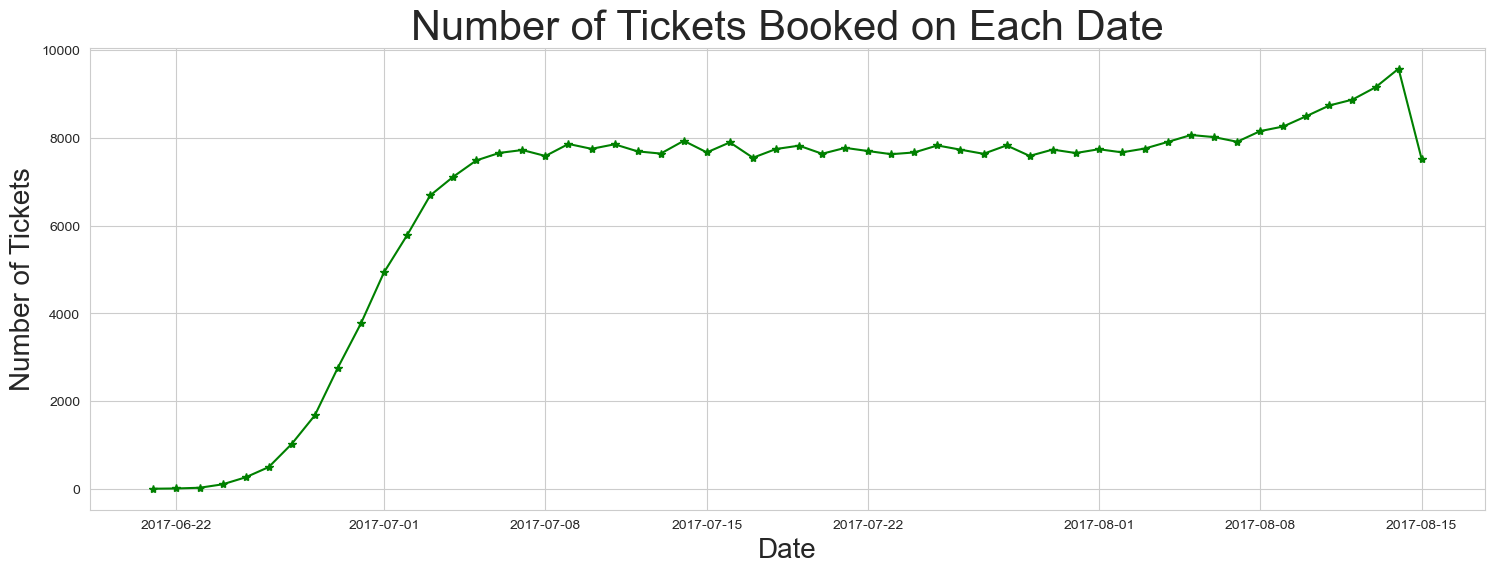

In [31]:
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], color='green', scalex=True, marker = "*")
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

# Observation:

Utilized a line chart visualization to analyze the trend of ticket bookings and revenue earned.

The number of tickets booked showed a gradual increase from June 22nd to July 7th.

From July 8th until August, ticket bookings remained relatively stable with a noticeable peak in bookings on a single day.

The revenue earned by the company is closely correlated with the number of tickets booked.

The total revenue earned followed a similar trend throughout the analyzed time period.

Further exploration of the factors contributing to the peak in ticket bookings could help increase overall revenue and optimize operational strategies.

In [32]:
bookings = pd.read_sql_query("SELECT * FROM bookings", conn)
bookings['book_date']= pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings.head()

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07


In [33]:
bookings_amount = bookings.groupby('date')[['total_amount']].sum()
bookings_amount.head()

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400


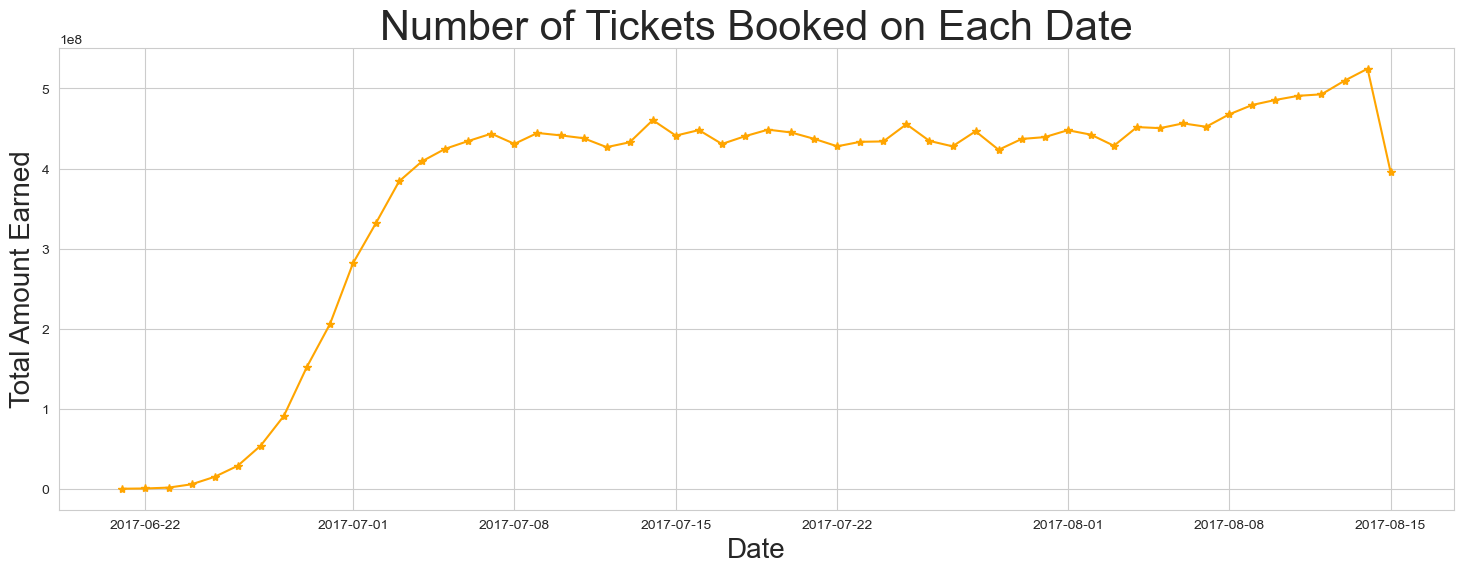

In [34]:

bookings_amount = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(bookings_amount.index, bookings_amount['total_amount'],color='orange',scalex=True, marker = '*')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

Average Charges for  each aircraft with different fare comditions?

In [35]:
Average_charges =  pd.read_sql_query("""SELECT fare_conditions, aircraft_code, avg(amount) 
                                        FROM ticket_flights
                                        JOIN flights ON ticket_flights.flight_id = flights.flight_id
                                        GROUP BY aircraft_code, fare_conditions""", conn )

Average_charges.head()

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175


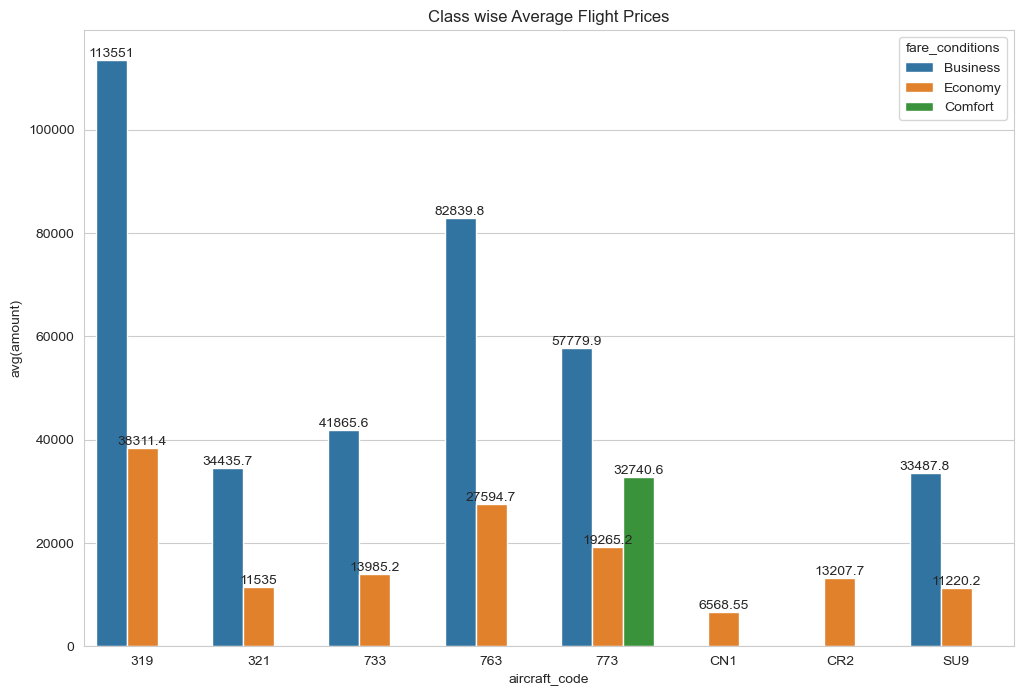

In [36]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(data= Average_charges, x='aircraft_code', y='avg(amount)', hue='fare_conditions')
plt.title('Class wise Average Flight Prices')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation= 0)
plt.show()

In [37]:
crafts = pd.read_sql("""SELECT aircraft_code, model->'en'
                        FROM aircrafts_data
                        where aircraft_code IN (319, 321, 733, 763, 773, 'CN1', 'CR2', 'SU9');""", conn)
crafts

,aircraft_code,model->'en'
0,773,"""Boeing 777-300"""
1,763,"""Boeing 767-300"""
2,SU9,"""Sukhoi Superjet-100"""
3,321,"""Airbus A321-200"""
4,319,"""Airbus A319-100"""
5,733,"""Boeing 737-300"""
6,CN1,"""Cessna 208 Caravan"""
7,CR2,"""Bombardier CRJ-200"""


# Observation:

Here successfully derived the names of airplanes using their codes

So it seems like " Airbus A319-100 " is having maximum average number of Business class seats.

Also " Airbus A319-100 " is having maximum average number of Economy seats.

And " Boeing 777-300 " is having maximum number of Comfort seats.

# Analyzed Occupancy Rate

To maximize profitability, airlines must analyze revenue streams, including overall income, average revenue per ticket, and occupancy rates. This information helps identify profitable aircraft types, itineraries, and pricing optimization opportunities. The highest total revenue is generated by the SU9 aircraft, likely due to its lower ticket prices. The CN1 aircraft has the lowest total revenue, possibly due to its limited economy class offering. Monitoring average occupancy rates helps airlines fill seats efficiently, increase revenue, and reduce expenses. Improving occupancy rates can be financially beneficial and achieved through pricing strategies and operational considerations. Airlines should focus on optimizing pricing strategies for gradual revenue growth.

For each aircraft, calculated total revenue per year and average revenue per ticket.

In [38]:
revenue = pd.read_sql_query("""SELECT aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count AS avg_revenue_per_ticket FROM 
                               (SELECT aircraft_code,COUNT(*) as ticket_count, 
                               SUM(amount) as total_revenue FROM ticket_flights
                               JOIN flights ON ticket_flights.flight_id = flights.flight_id
                               GROUP BY aircraft_code)""", conn)
revenue.head()

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765


Calculated the average occupancy rate per aircraft.

In [39]:
occupancy_rate = pd.read_sql_query("""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
                                      AVG(a.seats_count)/b.num_seats AS occupancy_rate FROM
                                      (SELECT aircraft_code,flights.flight_id,COUNT(*) AS seats_count FROM boarding_passes
                                      INNER JOIN flights
                                      ON boarding_passes.flight_id = flights.flight_id
                                      GROUP BY aircraft_code,flights.flight_id) AS a
                                      INNER JOIN 
                                      (SELECT aircraft_code,COUNT(*) AS num_seats FROM seats
                                      GROUP BY aircraft_code) AS b
                                      ON a.aircraft_code = b.aircraft_code GROUP BY a.aircraft_code""", conn)
occupancy_rate.head()

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019


Calculated by how much the total annual turnover could increase by giving all aircraft a 10 % higher occupancy rate

In [40]:
occupancy_rate['inc_occupancy_rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [41]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) AS total_revenue FROM ticket_flights
                                     JOIN flights ON ticket_flights.flight_id= flights.flight_id
                                     GROUP BY aircraft_code """, conn)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [42]:
pd.set_option('display.float_format',str)

In [43]:
occupancy_rate['Increased_Total_Annual_Turnover']= (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc_occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate,Increased_Total_Annual_Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


# Conclusion:

In conclusion, airlines can maximize profitability by analyzing revenue data and making informed decisions. Factors such as total revenue, average revenue per ticket, and average occupancy per aircraft play a crucial role in this analysis. By identifying areas for improvement, adjusting pricing strategies, and optimizing routes, airlines can increase their profitability. However, it's important for airlines to consider consumer happiness and safety while striving for profit. Balancing these factors is key to long-term success in the competitive airline industry. Adopting a data-driven approach to revenue analysis and optimization can lead to sustainable growth and success.